In [12]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# ENERGY EFFICIENCY DATASET (REGRESSION)
# Load dataset
energy = pd.read_excel("../input/energy-efficiency/ENB2012_data.xlsx")

print("\nEnergy Efficiency Dataset shape:", energy.shape)
print(energy.head())


Energy Efficiency Dataset shape: (768, 10)
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [13]:
# Features & Targets
X_energy = energy.iloc[:, :-2]   # first 8 columns (building parameters)
y_energy = energy.iloc[:, -2]    # Heating Load (target)

In [14]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print("\nLinear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Linear Regression Performance:
MSE: 9.153207645941675
R² Score: 0.9121846294352438


In [16]:
# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression Performance:
MSE: 9.687793363183417
R² Score: 0.9070558434758186


In [17]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression Performance:
MSE: 9.224364870614512
R² Score: 0.9115019509366549


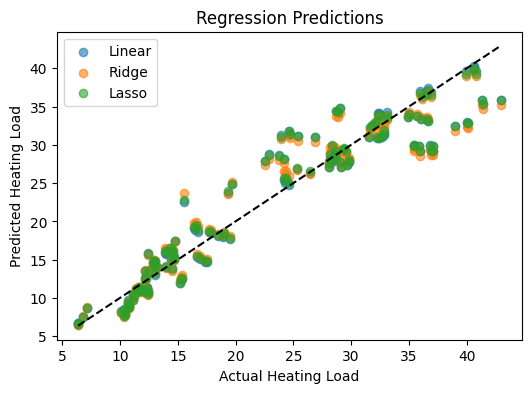

In [18]:
# Plot predictions vs actual
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6, label="Linear")
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label="Ridge")
plt.scatter(y_test, y_pred_lasso, alpha=0.6, label="Lasso")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Regression Predictions")
plt.legend()
plt.show()